### Import Dependencies

In [26]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
                            StratifiedKFold,
                            cross_validate
                            )

from sklearn.metrics import (
                            classification_report, 
                            confusion_matrix,
                            roc_auc_score,
                            roc_curve,
                            precision_recall_curve,
                            f1_score,
                            precision_score,
                            recall_score,
                            accuracy_score
                            )
warnings.filterwarnings('ignore')

### Loading the Data

In [3]:
X_train = np.load('artifacts/X_train.npz')['arr_0']
Y_train = np.load('artifacts/Y_train.npz')['arr_0']
X_test = np.load('artifacts/X_test.npz')['arr_0']
Y_test = np.load('artifacts/Y_test.npz')['arr_0']

### Configure k-Fold CV

In [4]:
cv = StratifiedKFold(
    n_splits = 6,
    random_state = 42,
    shuffle = True
)

In [5]:
model_lr = LogisticRegression(max_iter=1000, random_state=42)

In [19]:
cv_results = cross_validate(
    model_lr,
    X_train,
    Y_train,
    cv=cv, scoring='f1',
    return_train_score = True
)

In [20]:
cv_results

{'fit_time': array([0.04781985, 0.04312706, 0.03901076, 0.01048326, 0.02933383,
        0.02980924]),
 'score_time': array([0.00570941, 0.0180645 , 0.00979638, 0.00233603, 0.00462794,
        0.00397992]),
 'test_score': array([0.7195122 , 0.73212583, 0.72112676, 0.72531586, 0.71563981,
        0.72256828]),
 'train_score': array([0.72409559, 0.7212774 , 0.72348879, 0.72414119, 0.72529756,
        0.72191807])}

In [29]:
best_index = np.argmax(cv_results['test_score'])
fold_indices = list(cv.split(X_train, Y_train))

best_train_idx , best_test_idx = fold_indices[best_index]

X_train_best = X_train[best_train_idx]
Y_train_best = Y_train[best_train_idx]
X_test_best = X_train[best_test_idx]
Y_test_best = Y_train[best_test_idx]

In [30]:
model_lr.fit(X_train_best, Y_train_best)

LogisticRegression(max_iter=1000, random_state=42)

In [34]:
Y_hat_test = model_lr.predict(X_test)

In [35]:
accuracy = accuracy_score(Y_test, Y_hat_test)
precision = precision_score(Y_test, Y_hat_test)
recall = recall_score(Y_test, Y_hat_test)
f1_score = f1_score(Y_test, Y_hat_test)

In [36]:
print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}') 
print(f'f1_score: {f1_score}')

accuracy: 0.7205
precision: 0.39111747851002865
recall: 0.6707616707616708
f1_score: 0.49411764705882355


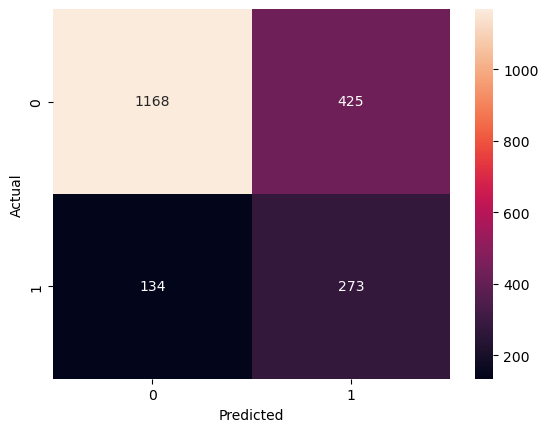

In [37]:
cm = confusion_matrix(Y_test, Y_hat_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()